In [1]:
%matplotlib inline

from pathlib import Path
import json

import matplotlib.pyplot as plt
import pandas as pd

data_dir = Path('/home/hadim/.data/Neural_Network/captchanet')
dataset_dir = data_dir / 'dataset'

log_dir = data_dir / 'log'
hyperparam_dir = log_dir / 'hyperparam_search' / 'v5_search_1'

In [2]:
root_data = json.load(open(hyperparam_dir / 'tuner.json'))
trial_paths = root_data['trials']

data = []
for trial_path in trial_paths:
  trial = json.load(open(trial_path))
  trial_id = trial['trial_id']
  
  datum = {}
  datum['trial_id'] = trial_id
  datum['trial_path'] = trial_path
  datum.update(trial['hyperparameters']['values'])
  
  for name, values in trial['averaged_metrics']['metrics_history'].items():
    datum[name] = values[-1]
    datum[f'{name}_history'] = values
    
  data.append(datum)
  
data = pd.DataFrame(data)
data = data.sort_values('val_accuracy', ascending=False)
data

,accuracy,accuracy_history,dropout_rate,loss,loss_history,lr,lr_history,momentum,optimizer_name,regularizer_value,starting_lr,trial_id,trial_path,use_regularizer,val_accuracy,val_accuracy_history,val_loss,val_loss_history
1,0.213256,[0.21325625479221344],0.3,3.646948,[3.6469481682777403],0.01,[0.009999999776482582],0.95,sgd,0.00010,0.01,f65dc0df377d03fc29bea22d800cddea,/home/hadim/.data/Neural_Network/captchanet/lo...,False,0.227975,[0.227974995970726],3.361218,[3.361217674255371]
0,0.206919,[0.20691874623298645],0.5,11.036755,[11.036755115509033],0.10,[0.10000000149011612],0.99,sgd,0.00001,0.10,43f13ce9f558b28cfcdbbcf4eb8ee2f9,/home/hadim/.data/Neural_Network/captchanet/lo...,False,0.216375,[0.21637499332427979],12.539790,[12.539789924621582]
2,0.207481,[0.207481250166893],0.2,5.461853,[5.461852927207946],0.10,[0.10000000149011612],0.90,sgd,0.10000,0.10,8cb94cd8ed53e740b14b757a51ad9f8d,/home/hadim/.data/Neural_Network/captchanet/lo...,True,0.212125,[0.2121250033378601],3.929967,[3.9299671421051023]


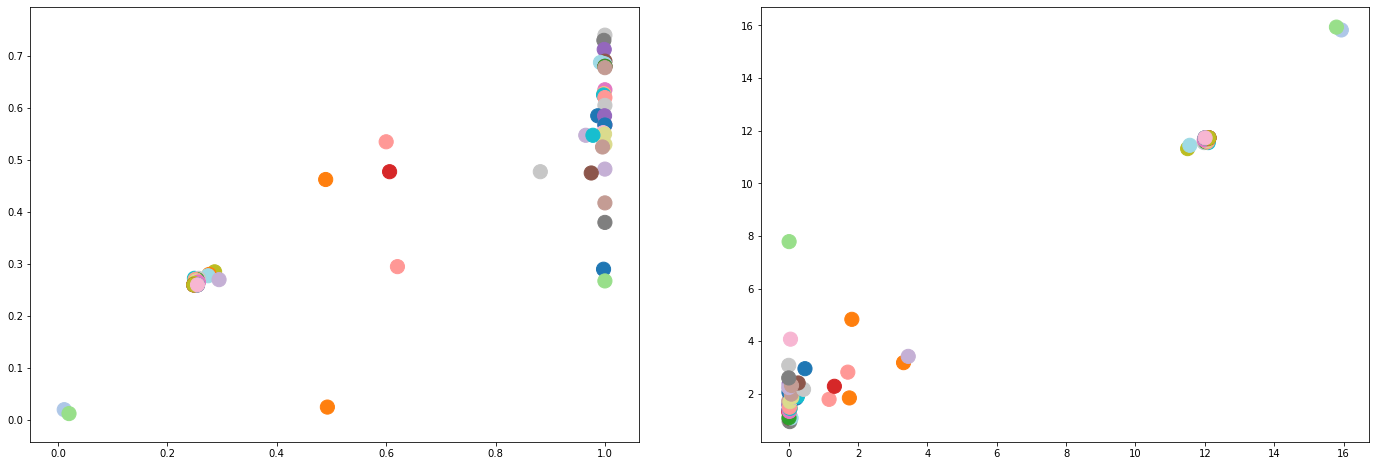

In [8]:
size = 8

fig, axs = plt.subplots(ncols=2, figsize=(size * 3, size))
axs = axs.flatten()

axs[0].scatter(data['accuracy'], data['val_accuracy'], c=data.index, cmap='tab20', s=200)

axs[1].scatter(data['loss'], data['val_loss'], c=data.index, cmap='tab20', s=200)

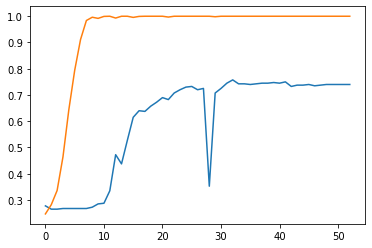

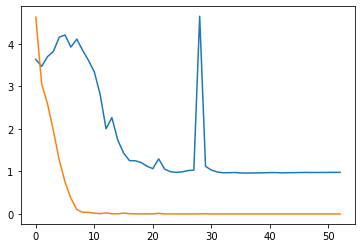

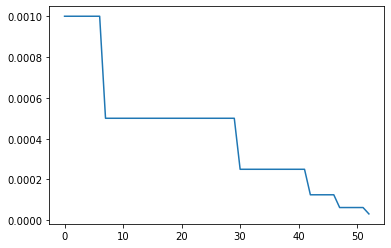

In [10]:
datum = data.iloc[0]

plt.figure()
plt.plot(datum['val_accuracy_history'])
plt.plot(datum['accuracy_history'])

plt.figure()
plt.plot(datum['val_loss_history'])
plt.plot(datum['loss_history'])

plt.figure()
plt.plot(datum['lr_history'])

In [5]:
datum

accuracy                                                              1
dense_units                                                        2048
kernel_initializer                                           he_uniform
loss                                                        1.53333e-07
lr                                                            3.125e-05
momentum                                                            0.9
n_base_filters                                                        8
n_conv                                                                2
n_layers                                                              5
optimizer_name                                                  rmsprop
starting_lr                                                       0.001
trial_id                               bb4081b86db1aba317fdc8f990a16f57
trial_path            /home/hadim/.data/Neural_Network/pyrip/log/hyp...
use_dense_layer                                                 